<b>Import Libraries

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/cancer.csv"
df = pd.read_csv(url)
breast_set = load_breast_cancer()

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<b>Pre-processing

In [8]:
df=df.dropna(axis='columns', how='all') # drop columns that have NAN
dataset = df.drop('id',  axis=1)
diagnosis = dataset.pop('diagnosis')
dataset.insert(30,'label',diagnosis)

dataset.columns = np.append(breast_set.feature_names, 'diagnosis')
dataset['diagnosis'].replace('B', 0, inplace=True)
dataset['diagnosis'].replace('M', 1, inplace=True)

X = dataset.iloc[:,:30].values
x = StandardScaler().fit_transform(X)
y = dataset.iloc[:, 30].values

<b>Principle Component Analysis and SVM Classification

In [9]:

def svm_train(x, y, kern, K):
  accuracies = []
  precisions = []
  recalls = []

  for N in K:
    pca = PCA(n_components=N)
    principalDf = pd.DataFrame(pca.fit_transform(x))
    newX = principalDf.values

    x_train, x_test, y_train, y_test = train_test_split(newX, y, train_size=0.8, test_size=0.2, random_state=0)

    classifier = SVC(kernel=kern, C=1)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

  return accuracies, precisions, recalls

<b>Linear Kernal Accuracy and Ploting

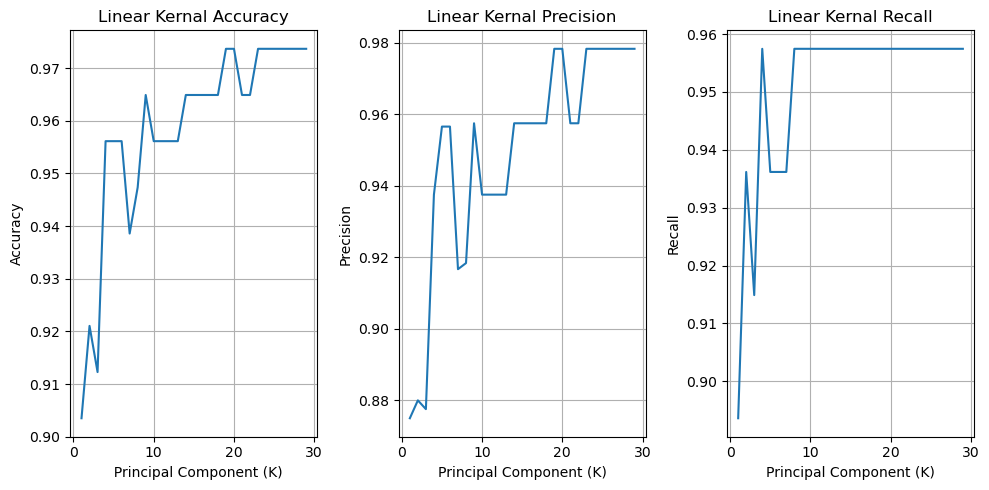

In [12]:

k = range(1, 30)
accuracy, precision, recall = svm_train(x, y, 'linear', k)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('  Principal Component (K)')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k, precision)
plt.title('Linear Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k, recall)
plt.title('Linear Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')
plt.grid(True)

plt.tight_layout()
plt.show()

<b>RBF Kernal Accuracy and Plot

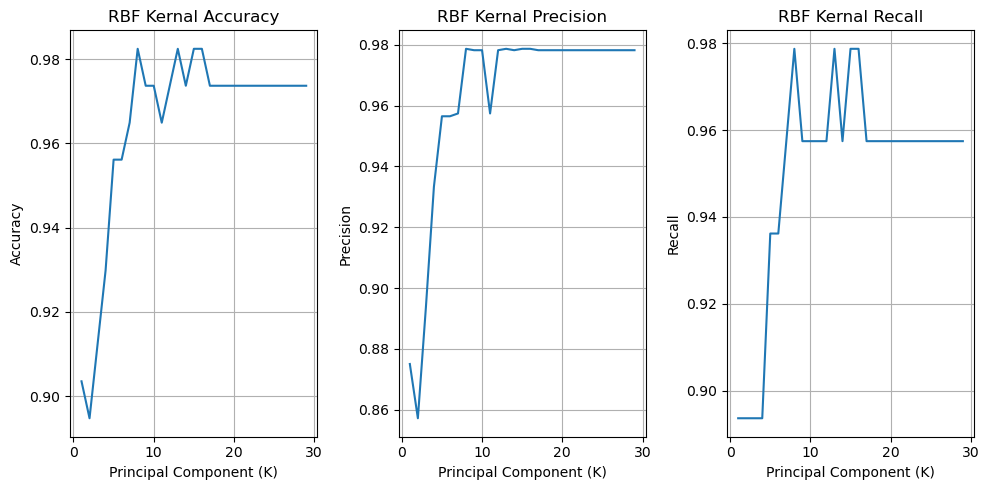

In [14]:
k = range(1, 30)
accuracy, precision, recall = svm_train(x, y, 'rbf', k)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k, precision)
plt.title('RBF Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k, recall)
plt.title('RBF Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')
plt.grid(True)

plt.tight_layout()
plt.show()

<b>Poly Kernal Accuracy and Plotting

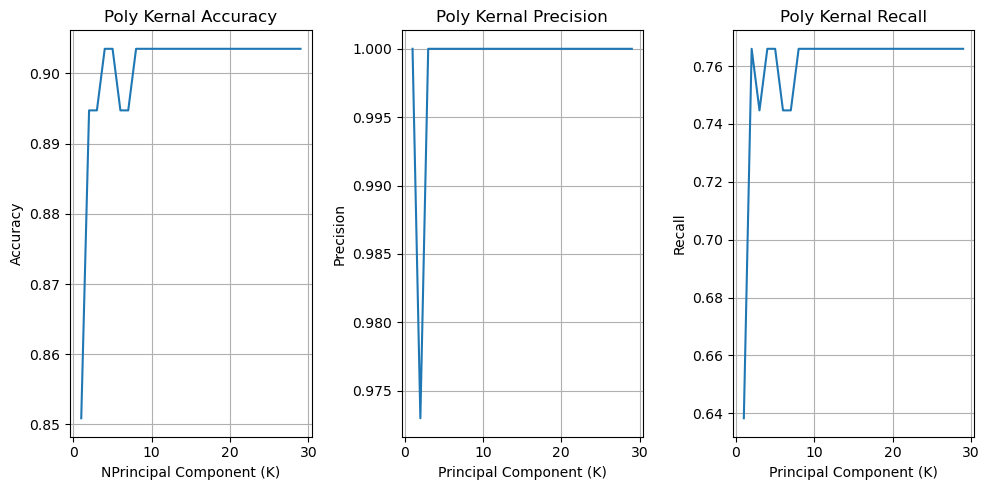

In [15]:
k = range(1, 30)
accuracy, precision, recall = svm_train(x, y, 'poly', k)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k, precision)
plt.title('Poly Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k, recall)
plt.title('Poly Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')
plt.grid(True)

plt.tight_layout()
plt.show()